In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import sqlite3
import json

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


## Read in data

read in station name

In [4]:
with open('buoy_station_name.json','r') as outfile:
    stndata=json.load(outfile)

data=[]
for ids in stndata:
    info = stndata[ids]
    data.append([ids,info['STN'],info['LAT'],info['LON'],info['LOCATE'],info['OWNER']])
    
# set up column names
columns = ['ST', 'STN','LAT','LON','LOCATE','OWNER']

# list to DataFrame 
stdf = pd.DataFrame(data=data,columns=columns)
stdf

,ST,STN,LAT,LON,LOCATE,OWNER
0,4N11,將軍,null,null,臺南將軍安檢所樓頂,氣象局
1,46694A,龍洞浮標,25.097778,121.9225,東北角龍洞遊艇港外海約0.25公里，該處水深約27公尺。,中央氣象局
2,46699A,花蓮浮標,24.031944,121.631389,花蓮七星潭外海約1公里，該處水深約30公尺。,中央氣象局
3,46708A,龜山島浮標,24.846667,121.926111,宜蘭龜山島龜尾端西方1公里，該處水深約25公尺。,交通部觀光局
4,46714D,小琉球浮標,22.313611,120.362778,小琉球海子口西南方外海約1.2公里，該處水深約99公尺。,中央氣象局
...,...,...,...,...,...,...
97,1306,臺北港,25.156667,121.371667,臺北港第3港埠,氣象局
98,1821,福隆,25.021667,121.95,福隆漁港碼頭,氣象局
99,1315,彭佳嶼,25.625278,122.075556,彭佳嶼海水淡化廠附近,氣象局
100,1551,和平港,24.297778,121.753889,花蓮和平港防波堤,和平工業港公司


## read in data from local sqlite database
read in data 

In [5]:
def read_sql(filename):
    conn = sqlite3.connect(filename, timeout=10)
    df = pd.read_sql("SELECT * FROM status",con=conn)
    conn.close()
    return df

filename = 'buoy_data.sqlite.db'
df = read_sql(filename)

In [6]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

df['H']        = df['H'].astype('float')/100.
df['T']        = df['T'].astype('float')
df['Tmean']    = df['Tmean'].astype('float')

df['Temp']     = df['Temp'].astype('float')
df['Zt']       = df['Zt'].astype('float')

df['Vm']       = df['Vm'].astype('float')
df['Dm']       = df['Dm'].astype('float')
df['Vg']       = df['Vg'].astype('float')
df['Vms']      = df['Vms'].astype('float')
df['Vgs']      = df['Vgs'].astype('float')
df['Zv']       = df['Zv'].astype('float')

df['P']        = df['P'].astype('float')

df['Vmsat']    = df['Vmsat'].astype('float')

In [7]:
# add STN station name variable 
def label_stname (row):
    if row['ST'] in stndata:
        return stndata[row['ST']]['STN']
    
df['STN'] = df.apply (lambda row: label_stname(row), axis=1)

In [8]:
for stn in enumerate(stdf['STN']):
    print(stn)

(0, '將軍')
(1, '龍洞浮標')
(2, '花蓮浮標')
(3, '龜山島浮標')
(4, '小琉球浮標')
(5, '新竹浮標')
(6, '臺東外洋浮標')
(7, '東沙島浮標')
(8, '馬祖浮標')
(9, '淡海')
(10, '淡水')
(11, '麟山鼻')
(12, '竹圍')
(13, '基隆')
(14, '新竹')
(15, '龍洞')
(16, '福隆')
(17, '馬祖')
(18, '外埔')
(19, '烏石')
(20, '臺中港')
(21, '蘇澳')
(22, '吉貝')
(23, '箔子寮')
(24, '和平港')
(25, '花蓮')
(26, '澎湖馬公')
(27, '東石')
(28, '塭港')
(29, '將軍')
(30, '成功')
(31, '東港')
(32, '小琉球')
(33, '高雄')
(34, '東沙島')
(35, '後壁湖')
(36, '蘭嶼')
(37, '蘇澳浮標')
(38, '澎湖浮標')
(39, '鵝鑾鼻浮標')
(40, '七股浮標')
(41, '金門浮標')
(42, '富貴角資料浮標')
(43, '臺東浮標')
(44, '基隆浮標')
(45, '彌陀浮標')
(46, '蘭嶼浮標')
(47, '東吉島波浪站')
(48, '七美浮標')
(49, '長潭里')
(50, '七美')
(51, '東吉島')
(52, '彭佳嶼資料浮標')
(53, '臺中資料浮標')
(54, '臺西平臺')
(55, '蘇澳')
(56, '臺中港')
(57, '將軍')
(58, '成功浮球')
(59, '後壁湖')
(60, '大鵬灣')
(61, '永安')
(62, '綠島')
(63, '石梯')
(64, '料羅灣')
(65, '福建古雷小浮標')
(66, '福建北礵小浮標')
(67, '福建黃岐小浮標')
(68, '福建斗尾港小浮標')
(69, '福建平潭小浮標')
(70, '福建牛山島小浮標')
(71, '福隆')
(72, '富貴角')
(73, '鼻頭角')
(74, '福建大浮標2號')
(75, '福建大浮標4號')
(76, '福建大浮標1號')
(77, '福建大浮標3號')
(78, '福建大浮標5號')
(79

## clean data

In [9]:
from datetime import datetime
dataset = df[['STN','ST','DATETIME','H','Temp','P','Vm','Vmsat']]

df_index = (dataset['DATETIME']>datetime(2015,1,1,0)) & (dataset['DATETIME']<datetime(2020,1,1,0))
dataset = dataset[df_index]

#stnlist=['新竹浮標','龜山島浮標','臺東外洋浮標','龍洞浮標','小琉球浮標','花蓮浮標','東沙島浮標','馬祖浮標']

stnlist=['東沙島浮標']
dataset = dataset[dataset['STN'].isin(stnlist)]

dataset = dataset.dropna()

<Figure size 3200x1600 with 0 Axes>

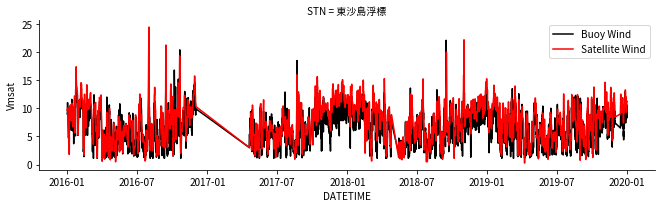

In [10]:
%matplotlib inline
plt.figure(figsize=(16,8),dpi=200)
g = sns.FacetGrid(dataset, col="STN", col_wrap=2, height=3, aspect=3)
g.map(sns.lineplot, 'DATETIME','Vm',color='k')
g.map(sns.lineplot, 'DATETIME','Vmsat',color='r')
plt.legend(labels=['Buoy Wind','Satellite Wind'])

In [11]:
dataset.pop('DATETIME')
dataset.pop('ST')
dataset.pop('STN')

154912    東沙島浮標
154918    東沙島浮標
154924    東沙島浮標
154930    東沙島浮標
154936    東沙島浮標
          ...  
870948    東沙島浮標
870954    東沙島浮標
870960    東沙島浮標
870966    東沙島浮標
870972    東沙島浮標
Name: STN, Length: 4571, dtype: object

In [12]:
dataset.isna().sum()

H        0
Temp     0
P        0
Vm       0
Vmsat    0
dtype: int64

Drop those rows to keep this initial tutorial simple.

In [13]:
dataset = dataset.dropna()
dataset.isna().sum()

H        0
Temp     0
P        0
Vm       0
Vmsat    0
dtype: int64

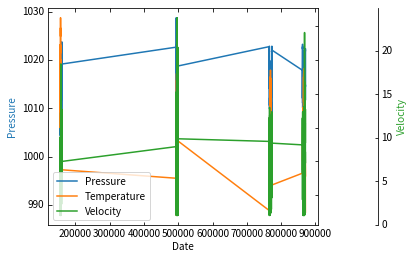

In [14]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)


host.set_xlabel("Date")
host.set_ylabel("Pressure")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

p1, = host.plot(dataset['P'], label="Pressure")
p2, = par1.plot(dataset['Temp'], label="Temperature")
p3, = par2.plot(dataset['Vm'], label="Velocity")

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

host.legend()

### Split the data into train and test

Now split the dataset into a training set and a test set.

Use the test set in the final evaluation of your models.

In [15]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Inspect the data

Have a quick look at the joint distribution of a few pairs of columns from the training set.

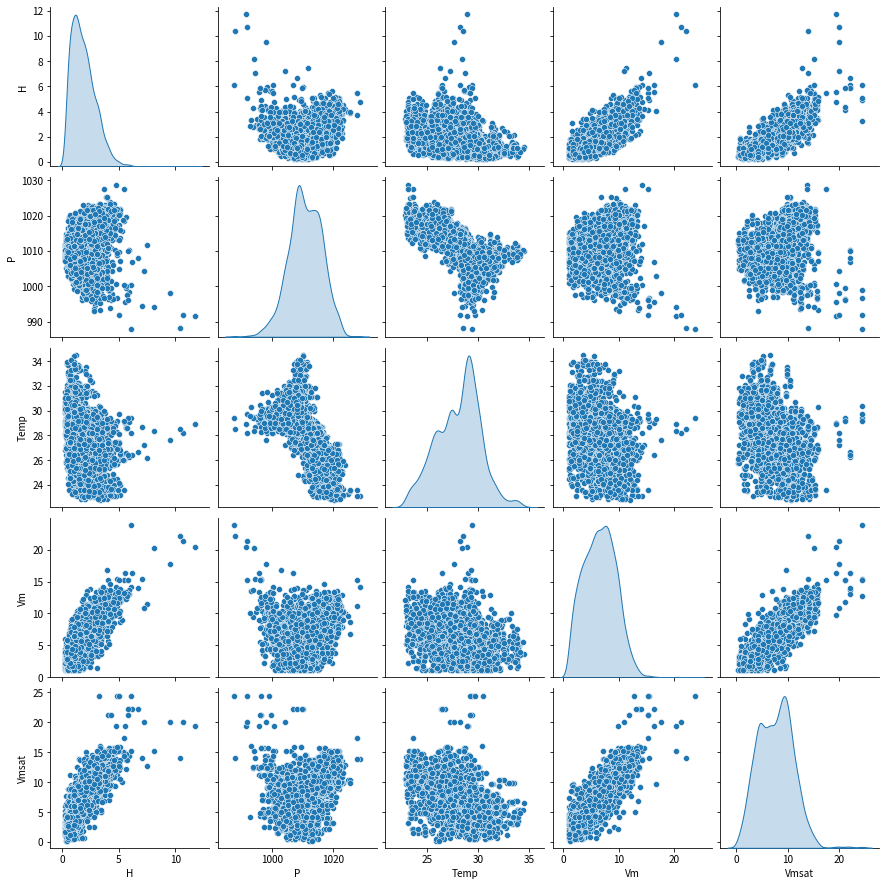

In [16]:
sns.pairplot(train_dataset[['H', 'P', 'Temp', 'Vm','Vmsat']], diag_kind='kde')

Also look at the overall statistics, note how each feature covers a very different range:

In [17]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
H,3657.0,1.875256,1.093719,0.220000,1.050000,1.690000,2.500000,11.730000
Temp,3657.0,28.029970,2.130491,22.800000,26.500000,28.400000,29.400000,34.500000
P,3657.0,1010.865217,5.371829,987.800000,1007.400000,1010.800000,1014.900000,1028.800000
Vm,3657.0,6.575226,2.907698,1.100000,4.300000,6.500000,8.700000,23.800000
Vmsat,3657.0,7.639996,3.371321,0.271658,4.938976,7.725167,10.026464,24.429303


### Split features from labels

Separate the target value, the "label", from the features. This label is the value that you will train the model to predict.

In [18]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Vm')
test_labels = test_features.pop('Vm')

## Normalization

In the table of statistics it's easy to see how different the ranges of each feature are.

In [19]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
H,1.875256,1.093719
Temp,28.029970,2.130491
P,1010.865217,5.371829
Vm,6.575226,2.907698
Vmsat,7.639996,3.371321


It is good practice to normalize features that use different scales and ranges. 

One reason this is important is because the features are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs. 

Although a model *might* converge without feature normalization, normalization makes training much more stable.

### The Normalization layer
The `preprocessing.Normalization` layer is a clean and simple way to build that preprocessing into your model.

The first step is to create the layer:

In [20]:
normalizer = preprocessing.Normalization(axis=-1)

Then `.adapt()` it to the data:

In [21]:
normalizer.adapt(np.array(train_features))

This calculates the mean and variance, and stores them in the layer. 

In [22]:
print(normalizer.mean.numpy())

[   1.875   28.03  1010.865    7.64 ]


When the layer is called it returns the input data, with each feature independently normalized:

In [23]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   2.63   27.6  1016.3    10.68]]

Normalized: [[ 0.69 -0.2   1.01  0.9 ]]


## Linear regression

Before building a DNN model, start with a linear regression.

### One Variable

Start with a single-variable linear regression, to predict `H` from `Vmsat`.

Training a model with `tf.keras` typically starts by defining the model architecture.

In this case use a `keras.Sequential` model. This model represents a sequence of steps. In this case there are two steps:

* Normalize the input `Vmsat`.
* Apply a linear transformation ($y = mx+b$) to produce 1 output using `layers.Dense`.

The number of _inputs_ can either be set by the `input_shape` argument, or automatically when the model is run for the first time.

First create the horsepower `Normalization` layer:

In [24]:
Vmsat = np.array(train_features['Vmsat'])

Vmsat_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
Vmsat_normalizer.adapt(Vmsat)

Build the sequential model:

In [25]:
Vmsat_model = tf.keras.Sequential([
    Vmsat_normalizer,
    layers.Dense(units=1)
])

Vmsat_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model will predict `H` from `Vmsat`.

Run the untrained model on the first 10 Vmsat values. The output won't be good, but you'll see that it has the expected shape, `(10,1)`:

In [26]:
Vmsat_model.predict(Vmsat[:10])

array([[ 0.65 ],
       [-0.231],
       [ 0.681],
       [-0.705],
       [ 0.938],
       [ 0.262],
       [-0.444],
       [-0.766],
       [ 0.434],
       [-0.418]], dtype=float32)

Once the model is built, configure the training procedure using the `Model.compile()` method. The most important arguments to compile are the `loss` and the `optimizer` since these define what will be optimized (`mean_absolute_error`) and how (using the `optimizers.Adam`).

In [27]:
Vmsat_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Once the training is configured, use `Model.fit()` to execute the training:

In [28]:
%%time
history = Vmsat_model.fit(
    train_features['Vmsat'], train_labels,
    epochs=100,
    batch_size=16,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 2min 44s, sys: 17min 49s, total: 20min 33s
Wall time: 39.5 s


Visualize the model's training progress using the stats stored in the `history` object.

In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,1.158749,1.238212,95
96,1.167741,1.225300,96
97,1.157531,1.230630,97
98,1.165573,1.218083,98
99,1.169347,1.218747,99


In [30]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 3])
  plt.xlabel('Epoch')
  plt.ylabel('Error [H]')
  plt.legend()
  plt.grid(True)

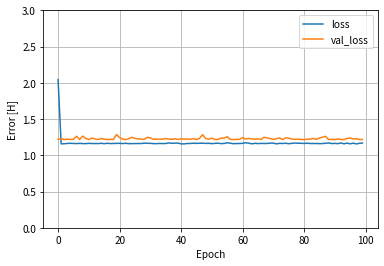

In [31]:
plot_loss(history)

Collect the results on the test set, for later:

In [32]:
test_results = {}

test_results['Vmsat_model'] = Vmsat_model.evaluate(
    test_features['Vmsat'],
    test_labels, verbose=0)

Since this is a single variable regression it's easy to look at the model's predictions as a function of the input:

In [33]:
def plot_Vmsat(x, y):
  plt.scatter(train_features['Vmsat'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Vmsat')
  plt.ylabel('Vm')
  plt.legend()

In [34]:
x = tf.linspace(0.0, 15, 251)
y = Vmsat_model.predict(x)

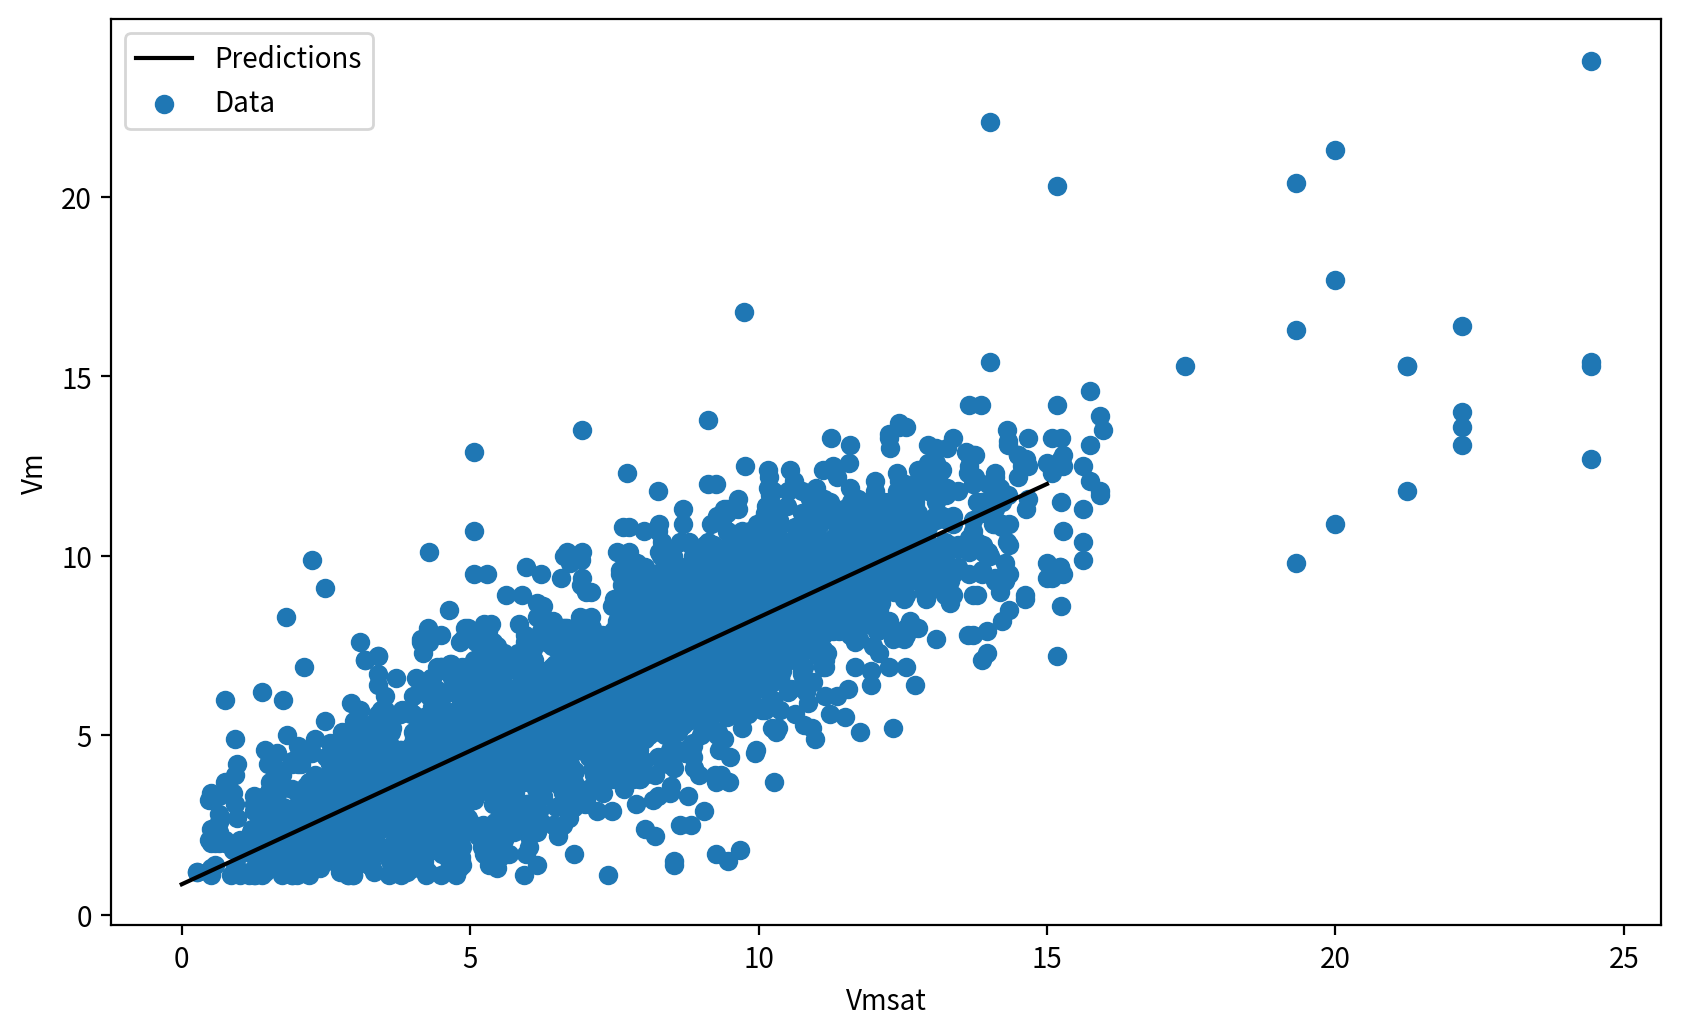

In [35]:
plt.figure(figsize=(10,6),dpi=200)
plot_Vmsat(x,y)

### Multiple inputs

You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same $y = mx+b$ except that $m$ is a matrix and $b$ is a vector.

This time use the `Normalization` layer that was adapted to the whole dataset.

In [36]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

When you call this model on a batch of inputs, it produces `units=1` outputs for each example.

In [37]:
linear_model.predict(train_features[:10])

array([[ 0.177],
       [-0.513],
       [-0.471],
       [-0.507],
       [ 1.018],
       [-1.037],
       [-1.682],
       [ 0.177],
       [-0.129],
       [-0.383]], dtype=float32)

When you call the model it's weight matrices will be built. Now you can see that the `kernel` (the $m$ in $y=mx+b$) has a shape of `(4,1)`.

In [38]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(4, 1) dtype=float32, numpy=
array([[-0.856],
       [-1.006],
       [-0.167],
       [ 0.814]], dtype=float32)>

Use the same `compile` and `fit` calls as for the single input `Vmsat` model:

In [39]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [40]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 1min 41s, sys: 11min 41s, total: 13min 22s
Wall time: 24.1 s


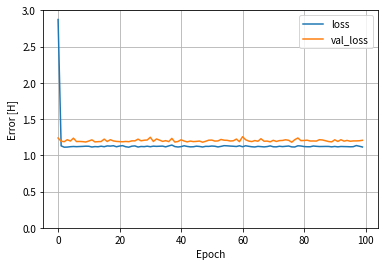

In [41]:
plot_loss(history)

In [42]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [43]:
pd.DataFrame(test_results, index=['Mean absolute error [Vm]']).T

,Mean absolute error [Vm]
Vmsat_model,1.154906
linear_model,1.115166


## A DNN regression

The previous section implemented linear models for single and multiple inputs.

This section implements single-input and multiple-input DNN models. The code is basically the same except the model is expanded to include some "hidden"  non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

* The normalization layer.
* Two hidden, nonlinear, `Dense` layers using the `relu` nonlinearity.
* A linear single-output layer.

Both will use the same training procedure so the `compile` method is included in the `build_and_compile_model` function below.

In [44]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu', name="layer1"),
      layers.Dense(64, activation='relu', name="layer2"),
      layers.Dense(1, name="layer3")
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

### One variable

Start with a DNN model for a single input: "Vmsat"

In [45]:
dnn_Vmsat_model = build_and_compile_model(Vmsat_normalizer)

This model has quite a few more trainable parameters than the linear models.

In [46]:
dnn_Vmsat_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
layer1 (Dense)               (None, 64)                128       
_________________________________________________________________
layer2 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer3 (Dense)               (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Train the model:

In [47]:
%%time
history = dnn_Vmsat_model.fit(
    train_features['Vmsat'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 3min 54s, sys: 26min 53s, total: 30min 48s
Wall time: 56.7 s


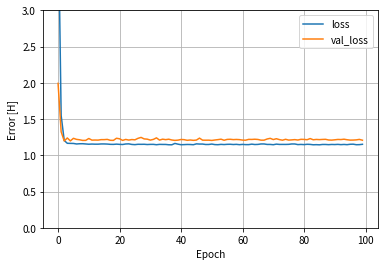

In [48]:
plot_loss(history)

In [49]:
x = tf.linspace(0.0, 15, 251)
y = dnn_Vmsat_model.predict(x)

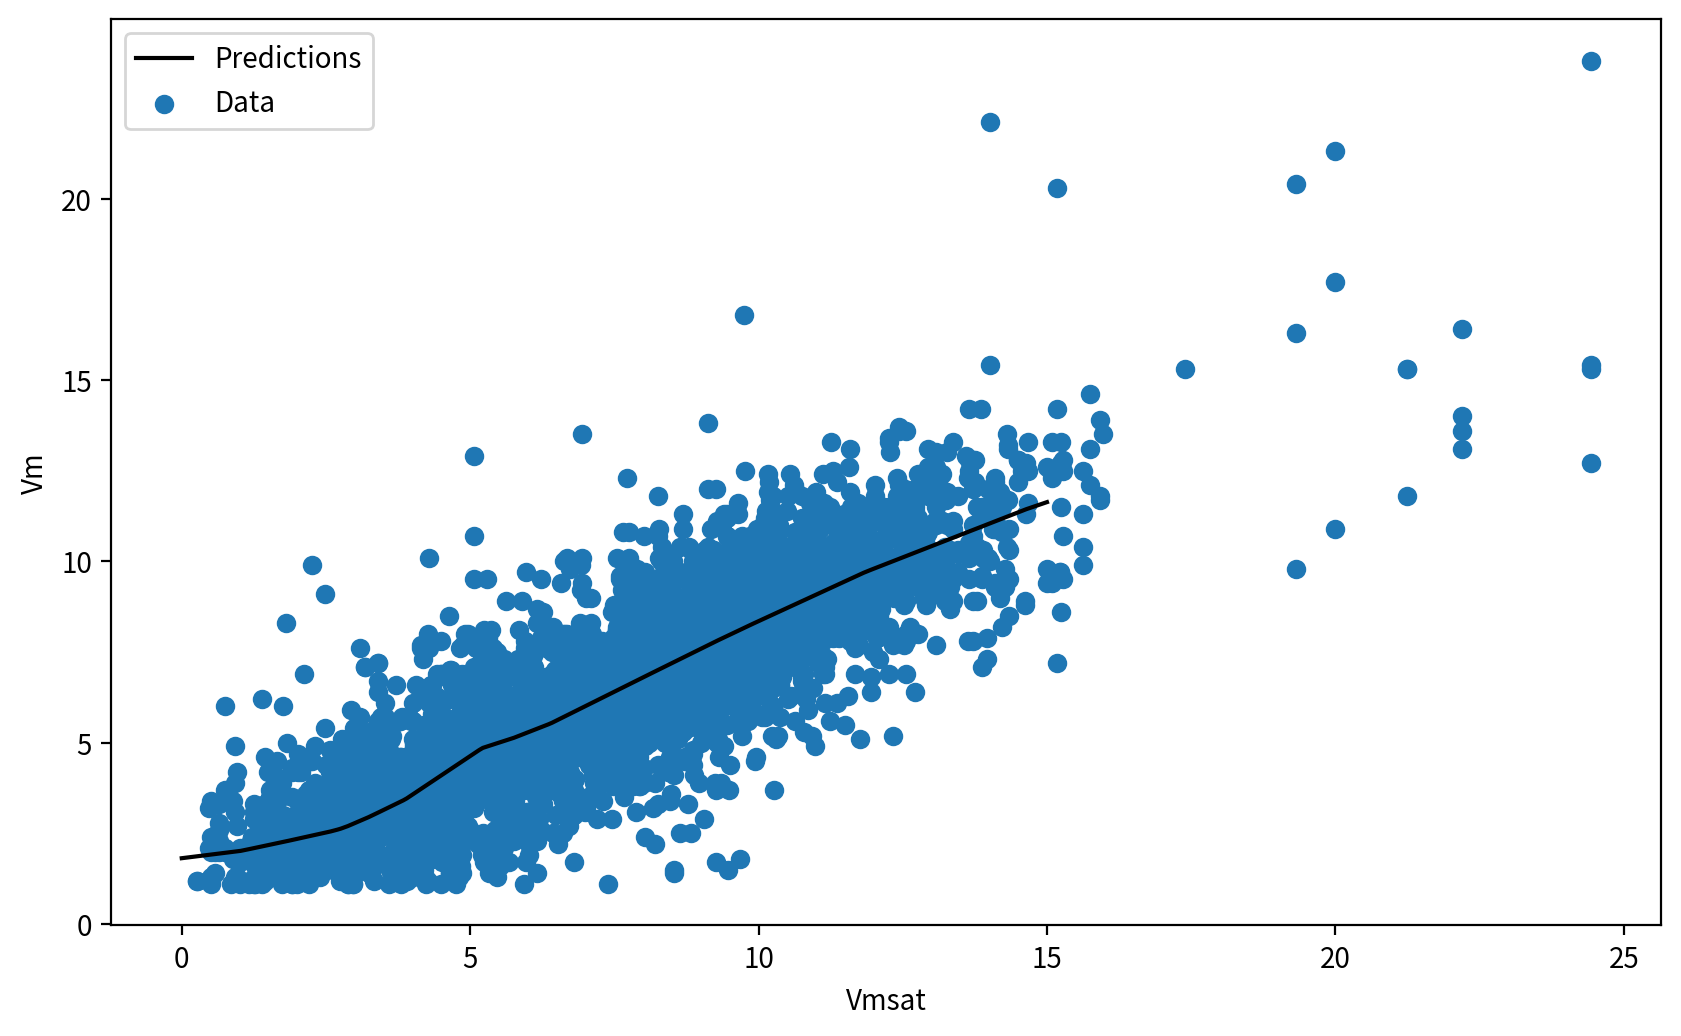

In [50]:
plt.figure(figsize=(10,6),dpi=200)
plot_Vmsat(x,y)

In [51]:
test_results['dnn_Vmsat_model'] = dnn_Vmsat_model.evaluate(
    test_features['Vmsat'], test_labels,
    verbose=0)

In [52]:
pd.DataFrame(test_results, index=['Mean absolute error [Vm]']).T

,Mean absolute error [Vm]
Vmsat_model,1.154906
linear_model,1.115166
dnn_Vmsat_model,1.148373


### Full model

If you repeat this process using all the inputs it slightly improves the performance on the validation dataset.

In [53]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
layer1 (Dense)               (None, 64)                320       
_________________________________________________________________
layer2 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer3 (Dense)               (None, 1)                 65        
Total params: 4,554
Trainable params: 4,545
Non-trainable params: 9
_________________________________________________________________


In [54]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4min 9s, sys: 29min 35s, total: 33min 44s
Wall time: 1min
Parser   : 105 ms


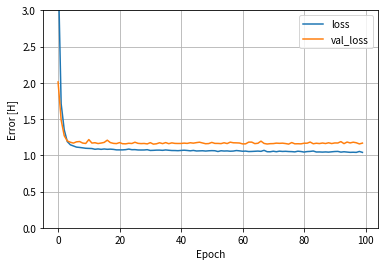

In [55]:
plot_loss(history)

In [56]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [57]:
pd.DataFrame(test_results, index=['Mean absolute error [Vm]']).T

,Mean absolute error [Vm]
Vmsat_model,1.154906
linear_model,1.115166
dnn_Vmsat_model,1.148373
dnn_model,1.091977


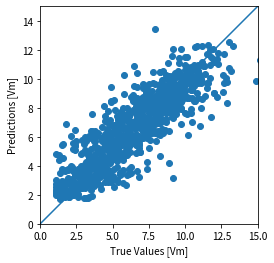

In [58]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Vm]')
plt.ylabel('Predictions [Vm]')
lims = [0, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


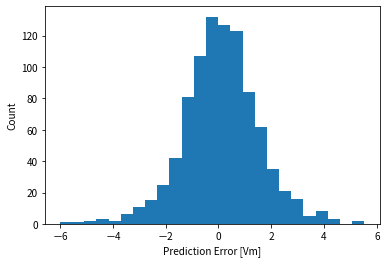

In [59]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Vm]')
_ = plt.ylabel('Count')

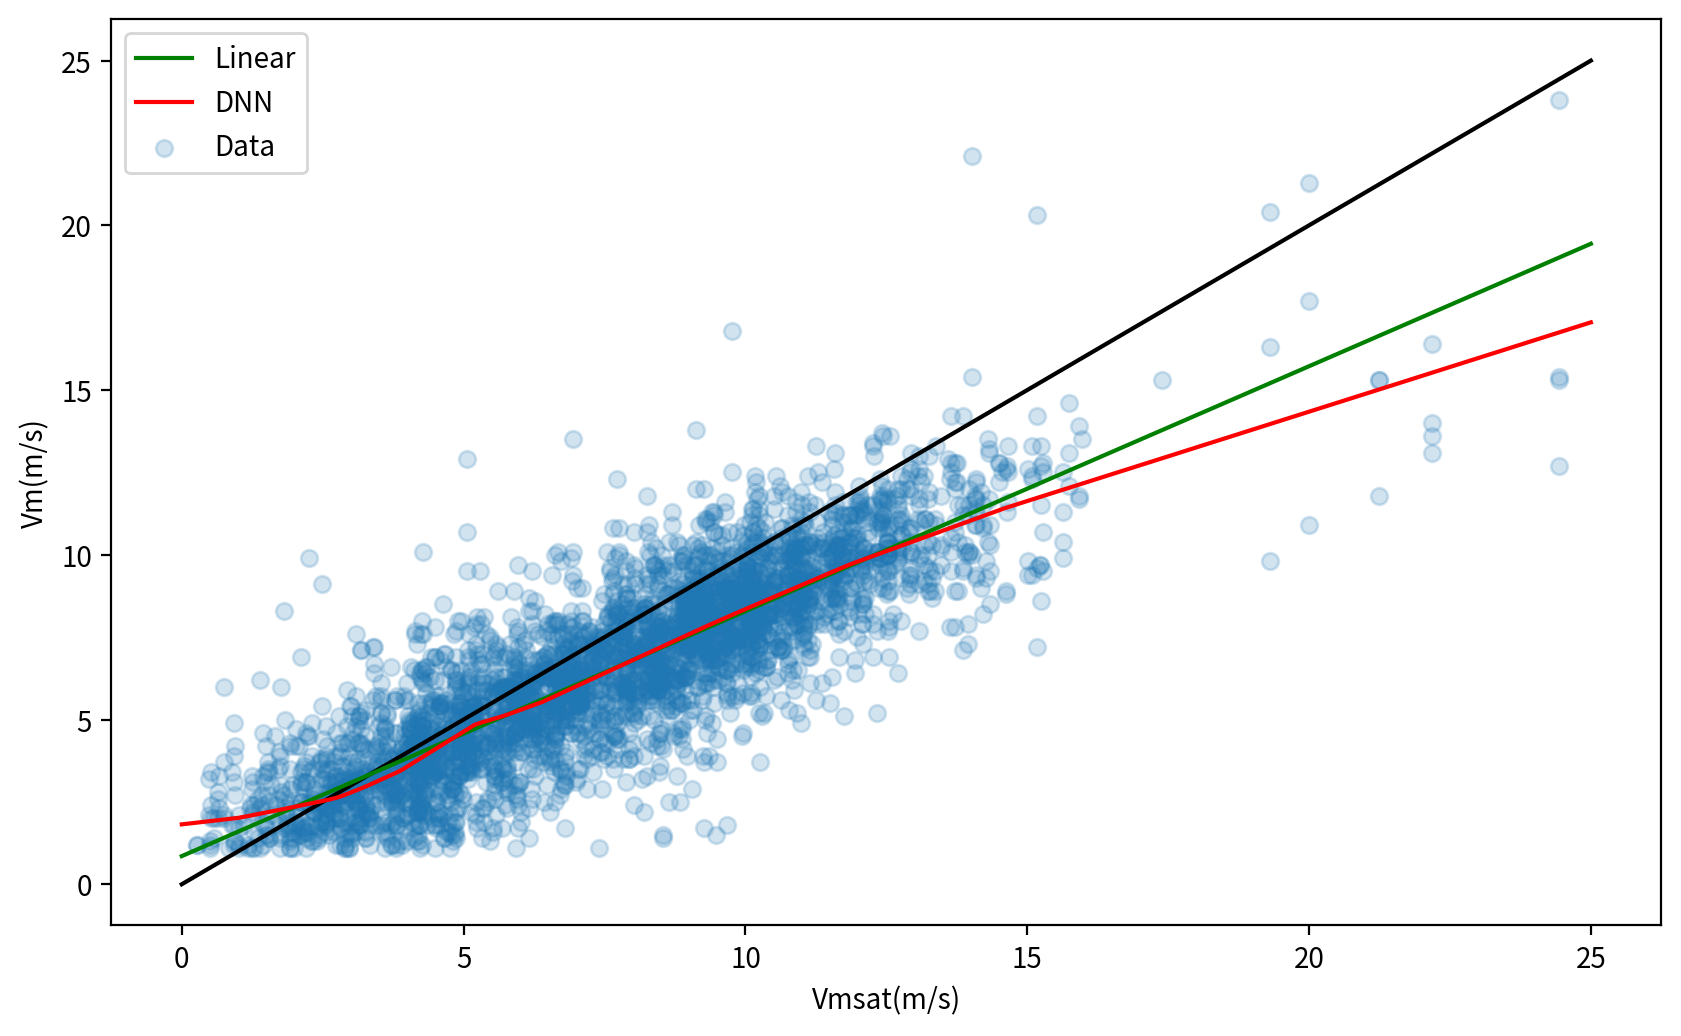

In [75]:
plt.figure(figsize=(10,6),dpi=200)
x = tf.linspace(0.0, 25, 251)
y1 = dnn_model.predict(x)
y2 = dnn_Vmsat_model.predict(x)
y4 = Vmsat_model.predict(x)

plt.scatter(train_features['Vmsat'], train_labels, label='Data',alpha=0.2)
#plt.plot(x, y1, color='b', label='DNN_multi')
plt.plot(x, x, color='k')
plt.plot(x, y4, color='g', label='Linear')
plt.plot(x, y2, color='r', label='DNN')
plt.xlabel('Vmsat(m/s)')
plt.ylabel('Vm(m/s)')
plt.legend()